# TD For-You Page

TD wants the hackathon experience to be top-notch for everyone. To assist in this, we want to provide a **For-You** page to our future applicants on our website tamudatathon.com. Can you use the TAMU Datathon data to make this happen?

**Ideas:**
- Visualization of Achievements
- Supervised Learning for Recommending Workshops
- Clustering for Team Building
- Natural Language Processing for Workshops Search Engine

**Datasets:**

We provide four datasets for this challenge. You are free to find your own as well.
1. TD 2020 Applicant Data
2. Bootcamps
3. Workshop Queries
4. Workshops


The details for these datasets are here: www.datalogz.io. 
1. Make an account, and for company, enter 'TAMU Datathon'
2. On the homepage, click 'Enter a Code' and enter SZMX5CNOZU
3. You should have access to the relevant tables on the left hand bar
4. Choose the desired table. Click "Definitions" to see column definitions


In [ ]:
import pandas as pd
apps = pd.read_csv('https://drive.google.com/uc?id=1mPK8_AasPMdqy3D9D0kxjjKcIXmhhcQo').set_index('userid') # read 'TD 2020 Applicant' data

In [ ]:
apps.head(2)

,school,other_school,majors,minors,age_bin,classification,first_generation,datascience_experience,technology_experience,num_hackathons_attended,workshop_suggestions,relavent_industries
userid,,,,,,,,,,,,
95030aef3e970680d882f1527f549d9e,Texas A&M University,NaN,"['Landscape Architecture & Urban Planning', 'P...",['Soil and Crop Sciences'],"(25, 30]",Ma,False,2,"['Excel', 'Python', 'Tableau', 'Pandas']",0,Python Fundamentals (Functions/Loops)\nVisuali...,"['consulting', 'public_policy', 'other']"
68ad76832a913de0d62df103b3d5b807,Texas A&M University,NaN,"['Electrical Engineering', 'Material Science',...",[],"(18, 20]",Jr,True,2,"['Excel', 'Python', 'Pandas', 'NumPy', 'MATLAB']",0,Training videos on different levels of machine...,"['technology', 'education', 'healthcare', 'ins..."


In [1]:
bootcamp = pd.read_csv('https://drive.google.com/uc?id=1sovKLesEqPbkUte_ysRP9mGQ1gFCO2ME').set_index('userid') # read 'Bootcamp' data

NameError: name 'pd' is not defined

In [ ]:
bootcamp.head(2)

,workshop
userid,
f48d02fd46d249ab2c37f925f405139f,Data Science: Start Here
f48d02fd46d249ab2c37f925f405139f,Getting a Job in Data Science


In [ ]:
joined = bootcamp.join(apps)
joined.columns

Index(['workshop', 'school', 'other_school', 'majors', 'minors', 'age_bin',
       'classification', 'first_generation', 'datascience_experience',
       'technology_experience', 'num_hackathons_attended',
       'workshop_suggestions', 'relavent_industries'],
      dtype='object')

# Visualization for Sponsorships?
Awesome sponsors make an awesome TD. Sponsors want to know why they should sponsor datathon. Can you answer this for them using data viz and EDA?

Text(0.5, 1.0, 'Top 10 Majors')

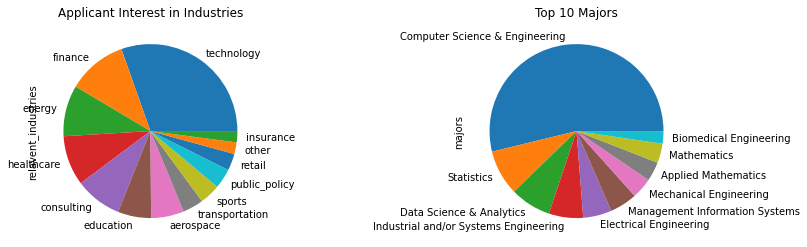

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
apps.relavent_industries.apply(eval).explode().value_counts().plot.pie(ax=ax1)
ax1.set_title('Applicant Interest in Industries')
apps.majors.apply(eval).explode().value_counts()[:10].plot.pie(ax=ax2)
ax2.set_title('Top 10 Majors')

In [ ]:
print(f'Predicting {joined.workshop.nunique()} workshops')
joined.workshop.value_counts(normalize=True).round(2)

Predicting 8 workshops


Data Science: Start Here                                 0.23
Getting a Job in Data Science                            0.22
Natural Language Processing                              0.12
Hacking Unsupervised Clustering Algorithms               0.10
Machine Learning: Start Here                             0.10
Convolutional Neural Networks & Semantic Segmentation    0.09
Model Interpretability                                   0.07
Story Telling With Data                                  0.07
Name: workshop, dtype: float64

# Supervised Learning for Recommending Workshops?
- Netflix recommends movies, Amazon recommends products, why can't TD recommend workshops to participants?

In [ ]:
target_name = 'workshop'
feature_names = ['datascience_experience', 'age_bin', 'classification', 'num_hackathons_attended']
target = joined[target_name]
features = joined[feature_names]

In [ ]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, features, target).mean().round(2)

0.23

In [ ]:
#@title MAP@K
#@markdown MAP@K is a metric you should report for your recommendation engine!

import numpy as np

def apk(actual, predicted, k):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=1):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


In [ ]:
# get the pairings of (user, list of ws attended)
actual = bootcamp.groupby('userid').workshop.apply(list)
# get the corresponding users from the applications df
reindexed = apps.loc[actual.index]

In [ ]:
def get_ordered_predictions(clf, features):
  probs = clf.predict_proba(features)
  predicted_idx = np.argsort(probs, axis=1)[:,::-1]
  return clf.classes_[predicted_idx]

clf.fit(features, target)
preds = get_ordered_predictions(clf, reindexed[feature_names])

In [ ]:
mapk(actual, preds, k=1)

0.5833333333333334

# Clustering for Team Building?
- Due to COVID, finding people to team with amoungst the 1200 other particants can be daunting. Could you recommend teamates considering such things as time zone? Think Facebook/Linkedin friend recommender...

# Natural Language Processing for Finding Workshops?

- Finding the right workshop to attend can be tricky and time is valuable during a datathon. Build a search engine for TD workshops that allows particpants to use natural langauge queries to find workshops, e.g. "how to import a dataset" -> Data Wrangling
- Idea: What if you trained word embeddings on towards data science [articles](https://www.kaggle.com/dorianlazar/medium-articles-dataset)?

In [ ]:
queries = pd.read_csv('https://drive.google.com/uc?id=1ff4xFh4fl0-SvpYNeYQoNvDbzdiZfn-t')
workshops = pd.read_csv('https://drive.google.com/uc?id=10MngpIZoAGgwAk_sxoORj7WPYs74nz5Y')

In [ ]:
queries.head(2)

,query,workshop
0,Using machine learning,Machine Learning Part 2/2: Applied
1,underlying math,Machine Learning Part 1/2: Theory


In [ ]:
workshops.head(2)

,event,workshop,tags,description,track,difficulty
0,TD 2020,Introduction to Python,"for, loops, functions, while, logic, variables...",Are you new to programming? Or do you want a r...,CS,0
1,TD 2020,Storytelling with Data,"presenting, impact, business, data science","In this talk, we will describe how we use data...",Industry,0


In [ ]:
workshops.tags = workshops.tags.apply(lambda xs: xs.split(', '))

In [ ]:
# load the Stanford GloVe model
import requests
url = 'https://td2020-static.s3.amazonaws.com/glove.6B.50d.txt'
r = requests.get(url)
open('glove.6B.50d.txt', 'wb').write(r.content) 

171350079

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 50)

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def distance(query, tag_set):
  if len(tag_set) == 0:
    return np.inf
  lquery = query.lower().split()
  prospect = ' '.join(tag_set).lower().split()
  return model.wmdistance(lquery, prospect)

def get_best_match_workshop(query):
  return np.argmin([distance(query, ws) for ws in workshops.tags.values])

print('{0:<70}{1:<40}{2:<40}'.format('Query', 'Predicted Workshop', 'Actual Workshop'))
for i in range(20):
  query = queries.iloc[i].query
  predict_idx = get_best_match_workshop(query)
  predicted = workshops.iloc[predict_idx].workshop
  actual = queries.iloc[i].workshop
  print('{0:<70}{1:<40}{2:<40}'.format(query, predicted, actual))

Query                                                                 Predicted Workshop                      Actual Workshop                         
Using machine learning                                                Machine Learning Part 1/2: Theory       Machine Learning Part 2/2: Applied      
underlying math                                                       Machine Learning: Start Here            Machine Learning Part 1/2: Theory       
The math portion                                                      Storytelling with Data                  Machine Learning Part 1/2: Theory       
TensorFlow                                                            Introduction to Python                  Intro to Neural Networks                
Statisticd                                                            Introduction to Python                  Stats for Data Scientists               
Sampling bias                                                         Stats for Data Scientist

# Host On Web App?
Show us all you got by building a dashboard webapp in Python at
[streamlit.io](https://www.streamlit.io/)!